In [7]:
from obspy.core import Stream, read
from obspy.signal import PPSD
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
import matplotlib.colors as colors
from matplotlib.colors import Normalize
import pandas as pd
import os 
import os.path

In [2]:
path_to_files = '/Users/sydneydybing/StrainProject/2024/'

earthquakes = pd.read_csv(path_to_files + 'M6_catalog_2004-2024.csv', dtype = str)
earthquakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-13T15:54:53.808Z,49.215,-129.6178,7,6,mww,228,54,1.719,0.65,...,2023-06-17T21:36:51.040Z,NaN,earthquake,5.71,1.776,0.032,96,reviewed,us,us
1,2022-12-20T10:34:24.770Z,40.525,-124.423,17.91,6.4,mw,38,214,0.0818,0.18,...,2023-12-13T02:59:56.915Z,"15km WSW of Ferndale, CA",earthquake,0.67,0.4,NaN,0,reviewed,nc,nc
2,2022-11-22T16:39:05.789Z,30.7936,-116.3907,10,6.2,mww,164,61,0.494,0.75,...,2023-03-30T07:15:48.466Z,"28 km SW of Las Brisas, Mexico",earthquake,4.14,1.745,0.029,118,reviewed,us,us
3,2021-12-20T20:10:31.310Z,40.3901667,-124.298,27.04,6.2,mw,33,170,0.06557,0.13,...,2022-12-30T01:11:35.632Z,"7km N of Petrolia, CA",earthquake,0.46,0.34,NaN,0,reviewed,nc,nc
4,2021-07-08T22:49:48.110Z,38.5075,-119.4998333,7.45,6,mw,42,100,0.04846,0.06,...,2023-10-18T17:44:37.561Z,"Antelope Valley, CA",earthquake,0.14,0.25,NaN,0,reviewed,nc,nc
5,2020-05-15T11:03:27.176Z,38.1689,-117.8497,2.7,6.5,ml,27,55.79,0.357,0.2669,...,2023-08-25T20:46:08.292Z,"Monte Cristo Range, NV Earthquake",earthquake,NaN,2.1,NaN,NaN,reviewed,nn,nn
6,2020-03-31T23:52:30.781Z,44.4646,-115.1175,12.06,6.5,mww,NaN,31,0.885,0.66,...,2023-11-27T02:38:57.327Z,"Stanley, Idaho",earthquake,8.5,3.8,0.021,212,reviewed,us,us
7,2019-12-25T03:36:01.626Z,50.6106,-129.963,6.58,6.3,mww,NaN,77,1.853,0.67,...,2020-03-14T22:25:03.040Z,"203 km W of Port McNeill, Canada",earthquake,7.2,1.3,0.032,95,reviewed,us,us
8,2019-12-23T20:56:23.555Z,50.5169,-129.7573,10,6,mww,NaN,99,1.042,1.05,...,2020-03-07T17:47:53.040Z,"189 km W of Port McNeill, Canada",earthquake,5.7,1.8,0.038,66,reviewed,us,us
9,2019-12-23T19:49:43.086Z,50.6071,-129.9372,10,6,mww,NaN,100,1.149,1.06,...,2020-03-07T17:47:53.040Z,"201 km W of Port McNeill, Canada",earthquake,4.4,1.8,0.03,106,reviewed,us,us


In [3]:
weird_events_only = False
if weird_events_only:
    earthquakes = earthquakes.iloc[[4,15]]

small_test = False
if small_test:
    earthquakes = earthquakes[11:16]
    
one_at_a_time = True
if one_at_a_time:
#     earthquakes = earthquakes[:1]
    earthquakes = earthquakes.iloc[[20]]

origin_times = earthquakes.time.values
mags = earthquakes.mag.values

bsm_mda = pd.read_csv(path_to_files + 'bsm_metadata.csv')
NA_only = bsm_mda.loc[bsm_mda['LONG'] < -110]
stas = NA_only['BNUM'].values

eqs_test = earthquakes[4:5]
ots_test = origin_times[4:5]
mags_test = mags[4:5]
rows_for_extra_times = [8,9,14,16]

dist_array = np.load(path_to_files + 'NA_evt-sta_dist_array_less500km_withdata_withrmssnrs.npy')

# Array order:

# 0. Earthquake identifier
# 1. Earthquake origin time
# 2. Earthquake latitude
# 3. Earthquake longitude
# 4. Earthquake magnitude
# 5. Station name
# 6. Station latitude
# 7. Station longitude
# 8. Hypocentral distance (km)
# 9. RMS strain SNR

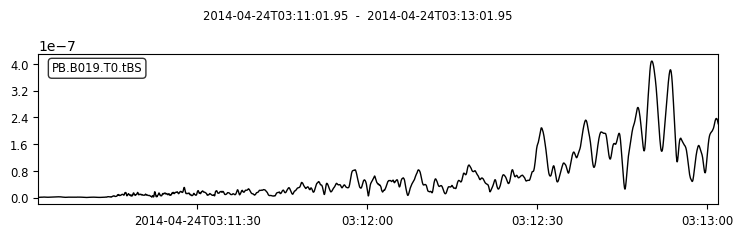

         network: PB
         station: B019
        location: T0
         channel: PST
       starttime: 2014-04-24T03:11:01.950000Z
         endtime: 2014-04-24T03:13:01.950000Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 2401
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 43, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 512, 'filesize': 22016})
[UTCDateTime(2014, 4, 24, 3, 11, 1, 950000)]


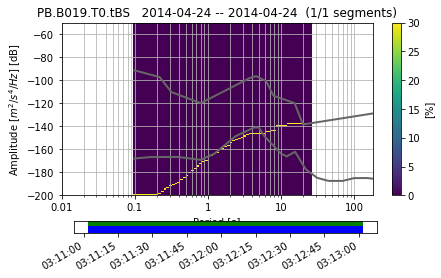

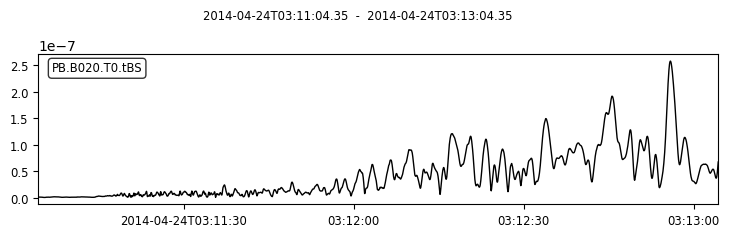

         network: PB
         station: B020
        location: T0
         channel: PST
       starttime: 2014-04-24T03:11:04.350000Z
         endtime: 2014-04-24T03:13:04.350000Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 2401
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 43, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 512, 'filesize': 22016})
[UTCDateTime(2014, 4, 24, 3, 11, 4, 350000)]


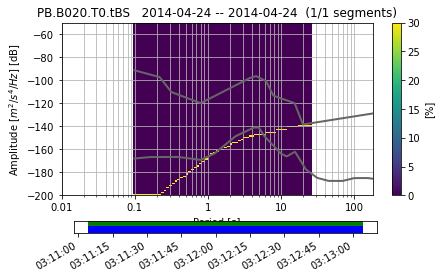

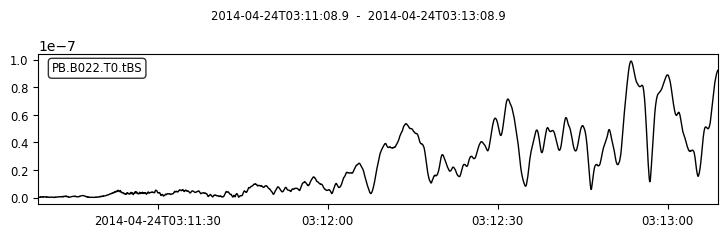

         network: PB
         station: B022
        location: T0
         channel: PST
       starttime: 2014-04-24T03:11:08.900000Z
         endtime: 2014-04-24T03:13:08.900000Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 2401
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 43, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 512, 'filesize': 22016})
[UTCDateTime(2014, 4, 24, 3, 11, 8, 900000)]


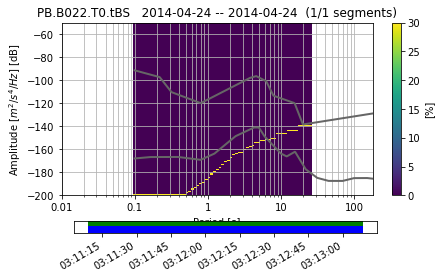

In [21]:
stas = ['B019', 'B020', 'B022']

for idx in range(len(earthquakes)):
        
    ot = origin_times[idx]
    
    if idx in rows_for_extra_times:
        cut_ot = ot[:13]
    else:
        cut_ot = ot[:10]
    
    eq_id = str(cut_ot) + '_M' + str(mags[idx])
#     print(eq_id)
        
    # Find rows that match this event in the array with the hypocentral distances
    
    i = np.where(dist_array[:,0] == eq_id)[0]
#     print(dist_array[i])
    
    for sta in stas:
        
#         print(sta)
        
        try:
            
            # Find row that matches this station within the rows of the right event
            j = np.where(dist_array[i,5] == sta)[0]
            hypdist = float(dist_array[i][j][0][8])
            int_hypdist = int(hypdist)
            snr = int(float(dist_array[i][j][0][9]))
        
            # Read in data - peak strain data only has the ones with SNR > 2
            pst_postp = read(path_to_files + 'strain_data/peak_post_p/' + str(eq_id) + '/' + str(sta) + '.mseed')
            strain_waves = read(path_to_files + 'strain_data/trimmed/' + str(eq_id) + '/' + str(sta) + '.mseed')
                
        except:
            continue # skips to next station
            
        pst_postp_times = pst_postp[0].times()
        pst_postp_data = pst_postp[0].data
        
        strain_waves_times = strain_waves[0].times()
        strain_waves_data = strain_waves[0].data
        
        samp_rate = pst[0].stats.sampling_rate
        seis_samp_rate = seis_waves[0].stats.sampling_rate

        low_xlim_sec = 8
        high_xlim_sec = 20

        low_xlim_samp = int(low_xlim_sec * samp_rate)
        high_xlim_samp = int(high_xlim_sec * samp_rate)

        # Move the flat line at the beginning of each timeseries to the same level

        norm_data = np.copy(pst_postp_data)
        norm_level = pst_postp_data[0]
#         print(norm_level)
        norm_data = norm_data - norm_level + 1*10**-9 # Subtract the starting value, add 10^-9 to set at 10^0 on nanostrain plot

        # Plot stations, but avoid plotting the weird stations for the two problem earthquakes
            
#         fig = plt.figure(figsize = (10,6), dpi = 300, facecolor = 'white', num = 1, clear = True)
#         ax = fig.add_subplot(111)
        
#         ax.set_title('Earthquake ' + str(eq_id) + ', station ' + str(sta) + '\nSNR: ' + str(snr) + '; hypdist: ' + str(int_hypdist) + ' km', fontsize = 18)
#         ax.plot(pst_postp_times[low_xlim_samp:high_xlim_samp], pst_postp_data[low_xlim_samp:high_xlim_samp]*10**9, color = 'red', label = 'Peak strain from P-arrival')
#         ax.plot(strain_waves_times[low_xlim_samp:high_xlim_samp], strain_waves_data[low_xlim_samp:high_xlim_samp]*10**9, color = 'blue', label = 'RMS strain')
#         ax.set_yscale('log')
#         ax.set_ylabel('Log of peak extensional\nnanostrain ($10^{-9}$)', fontsize = 15)
#         ax.set_xlabel('Time (s)', fontsize = 15)
#         ax.set_xlim(low_xlim_sec,high_xlim_sec)
#         if high_xlim_sec <= 30:
#             ax.axvline(x = 10, color = 'gray', linestyle = '--', alpha = 0.5)
#         ax.tick_params(labelsize = 13)
#         ax.legend(loc = 'lower right', ncol = 3, fontsize = 10)
        
#         plt.show();
        
        # Calculate PPSD
        
#         pst_postp[0].plot()
        strain_waves[0].plot()
        print(pst_postp[0].stats)
        
        paz = {'gain': 1,'poles': [1],'sensitivity': 1,'zeros': [0j, 0j]}
#         ppsd = PPSD(pst_postp[0].stats, paz, ppsd_length = 120)
        ppsd = PPSD(strain_waves[0].stats, paz, ppsd_length = 120)
#         ppsd.add(pst_postp[0])
        ppsd.add(strain_waves[0])
        print(ppsd.times_processed)
        ppsd.plot()
        
#         fig = plt.figure(figsize = (10,6), dpi = 300, facecolor = 'white', num = 1, clear = True)
#         ax = fig.add_subplot(111)
        
#         ax.set_title('Earthquake ' + str(eq_id) + ', station ' + str(sta) + '\nSNR: ' + str(snr) + '; hypdist: ' + str(int_hypdist) + ' km', fontsize = 18)
#         ax.plot(pst_postp_times[low_xlim_samp:high_xlim_samp], pst_postp_data[low_xlim_samp:high_xlim_samp]*10**9, color = 'red', label = 'Peak strain from P-arrival')
#         ax.set_yscale('log')
#         ax.set_ylabel('Log of peak extensional\nnanostrain ($10^{-9}$)', fontsize = 15)
#         ax.set_xlabel('Time (s)', fontsize = 15)
#         ax.set_xlim(low_xlim_sec,high_xlim_sec)
#         if high_xlim_sec <= 30:
#             ax.axvline(x = 10, color = 'gray', linestyle = '--', alpha = 0.5)
#         ax.tick_params(labelsize = 13)
#         ax.legend(loc = 'lower right', ncol = 3, fontsize = 10)
        
#         plt.show();

        # Create folder for the event
        fig_save_dir = path_to_files + 'figures/new_peak_strain_plots_post_p_wave_examples_overlays/odd_ones_after_normalizing/'

#         plt.savefig(fig_save_dir + str(eq_id) + '_' + str(sta) + '.png', format = 'PNG')
#         plt.close();

In [18]:
print(ppsd.times_processed)
ppsd.add(pst_postp)

[]


False